In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data: house square footage and corresponding prices
square_footage = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
prices = np.array([300000, 400000, 500000, 600000, 700000])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(square_footage, prices)

# Predict the price for a house with 1800 square footage
predicted_price = model.predict([[1800]])
print("Predicted price for a house with 1800 sq. ft:", predicted_price[0])


Predicted price for a house with 1800 sq. ft: 460000.0


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Sample data: house zip codes and corresponding prices
zip_codes = np.array([10001, 20001, 30001, 10001, 20001]).reshape(-1, 1)
prices = np.array([300000, 400000, 500000, 600000, 700000])

# One-hot encode the zip codes
encoder = OneHotEncoder()
zip_codes_encoded = encoder.fit_transform(zip_codes).toarray()

# Create and fit the linear regression model
model = LinearRegression()
model.fit(zip_codes_encoded, prices)

# Predict the price for a house with zip code 30001
predicted_price = model.predict(encoder.transform([[30001]]))
print("Predicted price for a house with zip code 30001:", predicted_price[0])

Predicted price for a house with zip code 30001: 500000.00000000006


In [11]:
new_zip_code = np.array([20001]).reshape(-1, 1)
new_zip_code_encoded = encoder.transform(new_zip_code).toarray()

# Predict the price for the new house
predicted_price_new = model.predict(new_zip_code_encoded)
print("Predicted price for a house with zip code 20001:", predicted_price_new[0])

Predicted price for a house with zip code 20001: 550000.0


In [12]:
zip_code_corr = np.corrcoef(zip_codes.flatten(), prices)[0, 1]
print("Correlation between zip codes and house prices:", zip_code_corr)

# Calculate correlation between predicted prices and actual prices
predicted_prices = model.predict(zip_codes_encoded)
price_corr = np.corrcoef(predicted_prices, prices)[0, 1]
print("Correlation between predicted prices and actual prices:", price_corr)

Correlation between zip codes and house prices: 0.18898223650461363
Correlation between predicted prices and actual prices: 0.31622776601683794


In [15]:
# Calculate correlation between square footage and house prices
square_footage_corr = np.corrcoef(square_footage.flatten(), prices)[0, 1]
print("Correlation between square footage and house prices:", square_footage_corr)

# Calculate correlation between predicted prices and actual prices using square footage
predicted_prices_sqft = model.predict(square_footage)
price_corr_sqft = np.corrcoef(predicted_prices_sqft, prices)[0, 1]
print("Correlation between predicted prices (based on square footage) and actual prices:", price_corr_sqft)

Correlation between square footage and house prices: 1.0
Correlation between predicted prices (based on square footage) and actual prices: 1.0


Business Problem

Background/History

Data Explanation (Data Prep/Data Dictionary/etc)

Methods

Analysis

Conclusion

Assumptions

Limitations

Challenges

Future Uses/Additional Applications

Recommendations

Implementation Plan

Ethical Assessment

# Real Estate Pricing Analysis

## Business Problem

A real estate agency wants to understand their real estate listings countrywide. Additionally, the company wants to build a model to accurately predict prices based on zip code and size, specifically for the state of New York.  The data provided contains historical listing information that will aid in the analysis and modeling. The model and predictions will be used to provide more accurate pricing recommendations to clients. 

## Background/History

## Data Explanation

The data is being obtained from Kaggle and is sourced from Realtor.com. The data contains housing data. 

In [1]:
import pandas as pd
df = pd.read_csv("realtor-data.csv")

In [12]:
import matplotlib.pyplot as plt

#### Data Dictionary

In [54]:
description = {
    'status': 'Current standing of the home (for sale or ready to build)',
    'bed': 'Number of beds in the home',
    'bath': 'Number of baths in the home',
    'acre_lot': 'Size of the lot',
    'city': 'City where the home is located',
    'state': 'State where the home is located',
    'zip_code': 'Zip code of the home',
    'house_size': 'Square fottage of the home',
    'prev_sold_date': 'Date when the home was previously sold',
    'price': 'Current sale price or previously sold price if the house is not for sale'
              }
    # Initialize an empty dictionary to store data types
dtype_dict = {}

    # Iterate through each column and store its data type in the dictionary
for col in df.columns:
    dtype_dict[col] = str(df[col].dtype)

series1 = pd.Series(description, name='description')
series1 = series1.rename_axis('column')
series2 = pd.Series(dtype_dict, name='data_type')
series2 = series2.rename_axis('column')



    # Combining the Series into a DataFrame using pd.merge()
data_dictionary = pd.merge(series1, series2, left_index=True, right_index=True)
print('Data Dictionary\n')
print(data_dictionary.to_markdown())


Data Dictionary

| column         | description                                                              | data_type   |
|:---------------|:-------------------------------------------------------------------------|:------------|
| status         | Current standing of the home (for sale or ready to build)                | object      |
| bed            | Number of beds in the home                                               | float64     |
| bath           | Number of baths in the home                                              | float64     |
| acre_lot       | Size of the lot                                                          | float64     |
| city           | City where the home is located                                           | object      |
| state          | State where the home is located                                          | object      |
| zip_code       | Zip code of the home                                                     | float64     |
| house_siz

In [49]:
unique_states_count = df['state'].nunique()

print("Number of unique states:", unique_states_count)

unique_states = df['state'].unique()

for state in unique_states:
    print(state)

Number of unique states: 25
Puerto Rico
Virgin Islands
Massachusetts
Connecticut
New Hampshire
Vermont
New Jersey
New York
South Carolina
Tennessee
Rhode Island
Virginia
Wyoming
Maine
Georgia
Pennsylvania
West Virginia
Delaware
Louisiana
Ohio
California
Colorado
Maryland
Missouri
District of Columbia


In [3]:
df_cleaned = df.dropna()

In [4]:
df_filtered = df[~df['state'].isin(['Puerto Rico', 'Virgin Islands'])]

In [5]:
df_filtered = df_filtered.dropna()

In [6]:
df_filtered['zip_code'] = df_filtered['zip_code'].astype(int).astype(str)

In [88]:
df_filtered.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
2701660,for_sale,3.0,3.0,0.40,Fredericksburg,Virginia,22405,2316.0,1999-06-01,439900.0
2701661,for_sale,4.0,3.0,0.06,Fredericksburg,Virginia,22407,2080.0,2004-04-22,319900.0
2701663,for_sale,3.0,3.0,0.50,Stafford,Virginia,22556,1747.0,2002-04-17,430000.0
2701664,for_sale,5.0,5.0,0.16,Stafford,Virginia,22554,4549.0,2017-01-30,744900.0
2701665,for_sale,4.0,3.0,0.27,Fredericksburg,Virginia,22407,2192.0,2020-04-28,425000.0


In [66]:
import matplotlib.pyplot as plt

In [4]:
state_set = df[['state', 'price']]

In [10]:
state_agg = state_set.groupby('state')['price'].sum().rename('total price')

In [ ]:
state_agg.plot(kind='bar', x = 'state', y = 'total price')
plt.title('Total Price by State')
plt.show()

In [29]:
subset_ny = df_filtered[df_filtered['state'] == 'New York']

In [15]:
ny_summed_prices = df_filtered.groupby('zip_code')['price'].sum().reset_index()

ny_summed_prices

,zip_code,price
0,10001,213750000.0
1,10002,689000.0
2,10003,275915000.0
3,10004,100000000.0
4,10005,14795000.0
...,...,...
5147,8887,3690000.0
5148,8889,37190500.0
5149,8901,116213204.0
5150,8902,298585465.0


In [34]:
import pgeocode
latitude_values = []
longitude_values = []
nomi = pgeocode.Nominatim('us')
for zip_code in ny_summed_prices['zip_code'].tolist():
    try:
        location = nomi.query_postal_code(zip_code)
        latitude = location.latitude
        longitude = location.longitude
        latitude_values.append(latitude)
        longitude_values.append(longitude)
    except:
        latitude_values.append(None)
        longitude_values.append(None)
        

ny_summed_prices['Latitude'] = latitude_values
ny_summed_prices['Longitude'] = longitude_values

In [56]:
ny_summed_prices = ny_summed_prices.dropna()
from folium.plugins import HeatMap
import folium
# Create a map centered on New York
ny_map = folium.Map(location=[40.7128, -74.006], zoom_start=11)

# Add markers for each location with house prices
#for idx, row in ny_summed_prices.iterrows():
#   folium.Marker([row['Latitude'], row['Longitude']], popup=f"${row['price']}").add_to(ny_map)

# Create a HeatMap layer using house prices and coordinates
heat_data = [[row['Latitude'], row['Longitude'], row['price']] for idx, row in ny_summed_prices.iterrows()]
HeatMap(heat_data).add_to(ny_map)

# Display the heat map
ny_map

In [33]:
nomi = pgeocode.Nominatim('us')
location = nomi.query_postal_code("10001")
location

postal_code          10001
country_code            US
place_name        New York
state_name        New York
state_code              NY
county_name       New York
county_code           61.0
community_name         NaN
community_code         NaN
latitude           40.7484
longitude         -73.9967
accuracy               4.0
Name: 0, dtype: object

In [10]:
import seaborn as sns

Correlation Matrix

In [7]:
df_num = df_filtered.drop(columns=['status', 'city', 'state', 'prev_sold_date'])

In [8]:
corr =  df_num.corr()

Text(0.5, 1.0, 'Features Correlation')

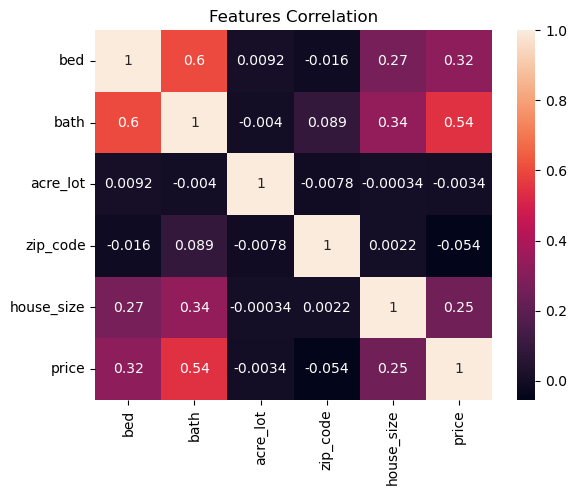

In [13]:
sns.heatmap(corr, annot=True)
plt.title('Features Correlation')

In [16]:
ny_summed_prices

,zip_code,price
0,10001,213750000.0
1,10002,689000.0
2,10003,275915000.0
3,10004,100000000.0
4,10005,14795000.0
...,...,...
5147,8887,3690000.0
5148,8889,37190500.0
5149,8901,116213204.0
5150,8902,298585465.0


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Separate the target from the features
feature = ny_summed_prices.drop('price', axis=1)
target = ny_summed_prices['price']

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [26]:
# Create and fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)


print("Model 1 Results")
# print("Predictions on test data:", predictions)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print("R-squared score:", r2)


Model 1 Results
Mean Squared Error: 1.0095666005774102e+17
Mean Absolute Error: 127857450.28387067
R-squared score: 0.005190385914512263


/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [21]:
# Calculates R2
r_sqaured = model.score(X_test, y_test)
print("R2 Value is:", r_sqaured)

R2 Value is: 0.005190385914512263


/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Subset ny 

Model #2

In [30]:
test_ny = subset_ny.drop(columns=['status', 'city', 'state', 'prev_sold_date'])

In [31]:
test_ny.head()

,bed,bath,acre_lot,zip_code,house_size,price
54248,3.0,2.0,2.02,12521,1600.0,425000.0
54258,4.0,2.0,0.24,12521,1239.0,225000.0
54267,4.0,1.0,4.20,12516,1500.0,299999.0
54268,3.0,2.0,2.90,12529,1404.0,374900.0
54278,3.0,2.0,1.20,12546,1350.0,375000.0


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
# Separate the target from the features
x = test_ny.drop('price', axis=1)
y = test_ny['price']

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Create and fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

print("Predictions on test data:", predictions)

Predictions on test data: [ 177363.03281198  874734.63944078  164156.82306573 ...  562253.79160977
 2593581.16087811  818226.10806117]


/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [35]:
print("Model 2 Results")
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print("R-squared score:", r2)

Model 2 Results
Mean Squared Error: 1341708654258.3293
Mean Absolute Error: 436656.6665262822
R-squared score: 0.3201483824250393


Model #3

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest Regressor model using the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model performance
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Model 3 Results")
print("Random Forest Regressor - Mean Squared Error:", rf_mse)
print("Random Forest Regressor - Mean Absolute Error:", rf_mae)
print("Random Forest Regressor - R-squared score:", rf_r2)

/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Model 3 Results
Random Forest Regressor - Mean Squared Error: 29911620514.03588
Random Forest Regressor - Mean Absolute Error: 8707.15125422424
Random Forest Regressor - R-squared score: 0.9848436070482107


In [ ]:
rf_r2 = r2_score(y_test, rf_predictions)
print("Model 3 Results")
print("Random Forest Regressor: Mean Squared Error:", rf_mse)
print("Random Forest Regressor - Mean Absolute Error:", rf_mae)
print("Random Forest Regressor - R-squared score:", rf_r2)